In [1]:
#1
#데이터 불러옴
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)

--2025-12-10 09:31:17--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-12-10 09:31:17--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-12-10 09:31:17--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... c

In [ ]:
#2
#pca 클래스의 객체를 만들때 n_components 매개변수에 주성분 개수를 지정
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

,n_components,50
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [ ]:
#3
#배열의 크기 확인
print(pca.components_.shape)

(50, 10000)


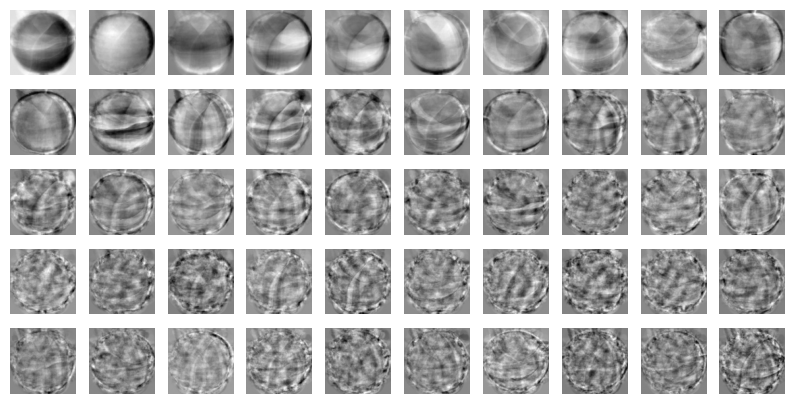

In [ ]:
#4
def draw_fruits(arr,ratio=1):
    n = len(arr) #n은 sample 개수
    #한 줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나누어 전체 행 갯수를 계산
    rows = int(np.ceil(n/10))
    #행이 1개이면 열의 개수는 샘플 개수. 그렇지 않으면 10개
    cols = n if rows < 2 else 10
    fig,axs = plt.subplots(rows, cols, 
                           figsize=(cols*ratio,rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()
draw_fruits(pca.components_.reshape(-1, 100, 100))
#위에 함수를 집어넣어야 그림이 나옴

In [ ]:
#5
#PCA의 transform() 메서드를 사용해 원본 데이터의 차원을 50으로 줄임
#d일단 fruits_2d의 배열 확인
print(fruits_2d.shape)

(300, 10000)


In [ ]:
#6
#50개의 주성분을 찾은 pca 모델을 사용해 이를 (300,50)크기의 배열로 변환했음
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [ ]:
#7
#앞에서 10000개 특성을 50개로 줄였음
#원본데이터의 손실이 발생할 수 있지만 분산이 최대한 큰 방향으로 데이터를 축소했기 때문에 원본데이터를 재구성 할 수 있음
#inverse_transform() 메서드로 차원축소한 50개 데이터를 전달해 10000개의 특성 복원
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)
#10000개로 특성 복원됨

(300, 10000)


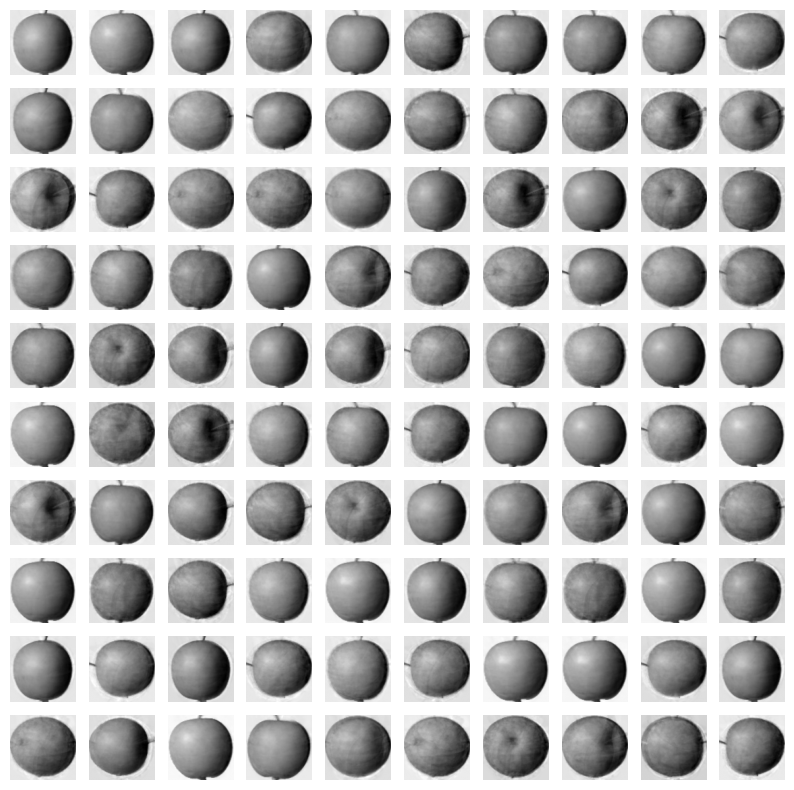

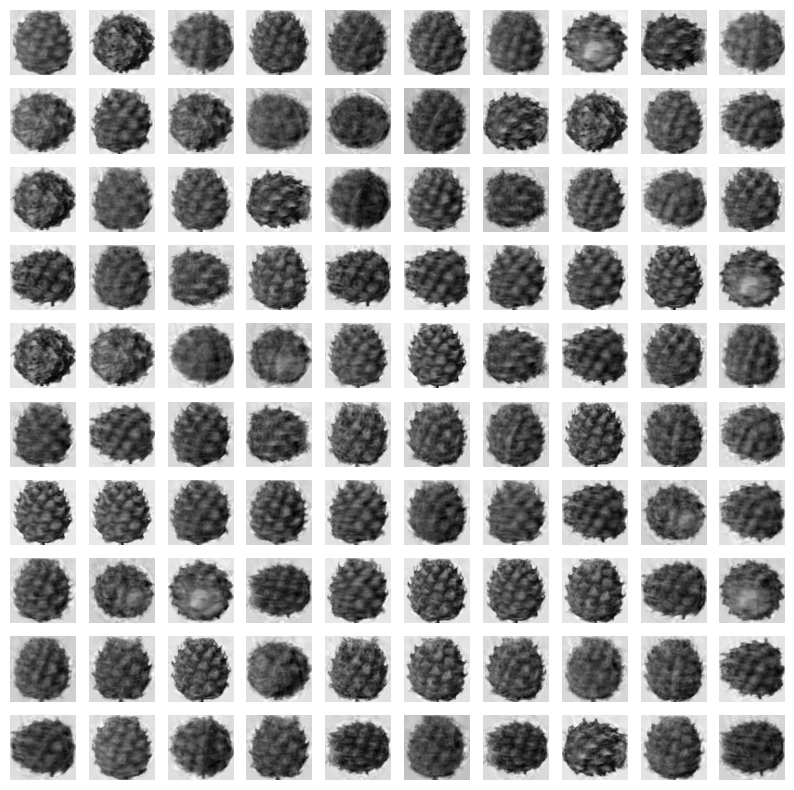

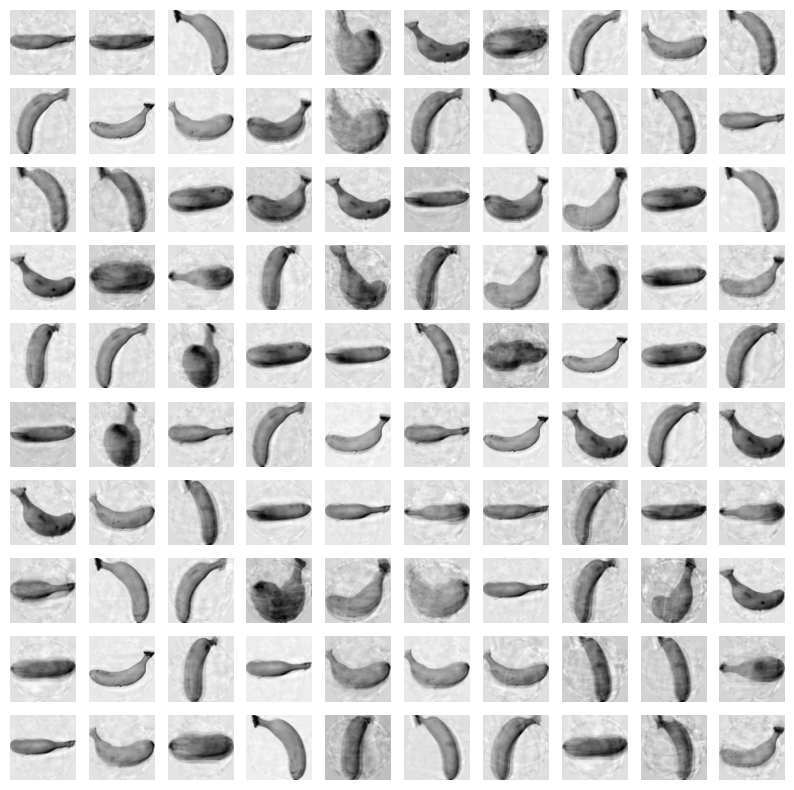

In [ ]:
#8
#100*100 크기로 바꾸어 100개씩 나누어 출력
#사과, 파인애플,바나나 순서
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")
    #출력 결과 보면 모든 과일이 다 잘 복원되어 있는걸 확인

In [ ]:
#9
#설명된 분산: 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
#이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비용을 얻을 수 있음
print(np.sum(pca.explained_variance_ratio_))
#92%, 높을 수록 원본데이터를 복원했을 때 원본 이미지의 품질이 높았던 이유.

0.9214875664792403


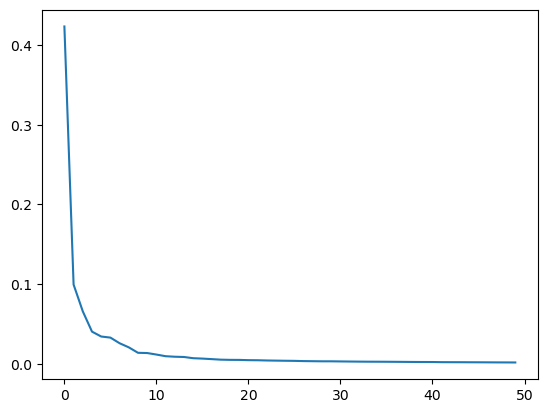

In [15]:
#10
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [16]:
#11
#다른 알고리즘과 함께 사용하기. 원본 데이터랑 PCA로 축소한 데이터를 각각 적용해보고 차이확인
#3개의 과일 사진을 분류해야 하므로 로지스틱 회귀 모델 사용함
#사이킷런의 logisticRegression 모델 만듬
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [17]:
#12
target = np.array([0]*100+[1]*100+[2]*100)

In [ ]:
#13
from sklearn.model_selection import cross_validate
scores = cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score'])) #교차검증의 점수, 매우 높음, 과대적합 위험
print(np.mean(scores['fit_time'])) #교차 검증 폴드의 훈련시간 

0.9966666666666667
0.1953969955444336


In [ ]:
#14
#PCA로 축소한 fruits_pca를 사용했을 때와 비교
scores = cross_validate(lr, fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
#50개의 특성만 사용했는데도 정확도가 동일하고 훈련 시간은 30배 감소됨


0.9966666666666667
0.011094903945922852


In [21]:
#15
#PCA클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾음
#PCA 모델 만듬
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

,n_components,0.5
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [ ]:
#16
print(pca.n_components_)
#몇개의 주성분을 찾았는지 확인

2


In [23]:
#17
#원본데이터 변환, 주성분이 2개이므로 변환된 데이터 크기는 (300,2)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [ ]:
#18
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
#2개의 특성을 사용해도 정확도가 99%

0.9933333333333334
0.02140970230102539


/home/user/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#19
#차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터를 찾아봄
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

#fruits_pca로 찾은 클러스터는 각각 110,99,91개 샘플 포함

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


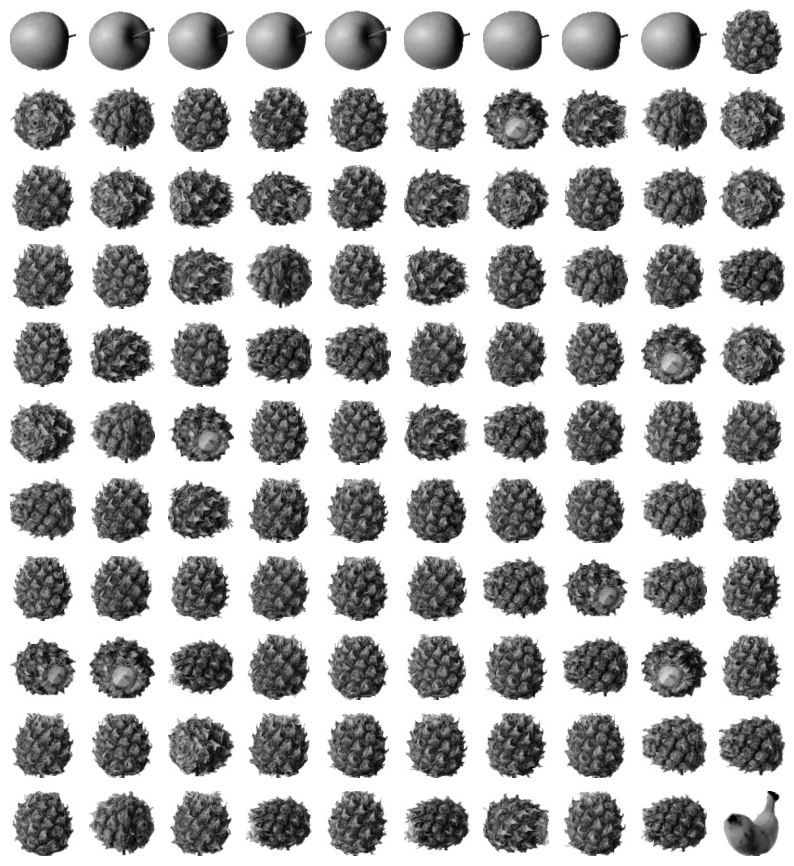

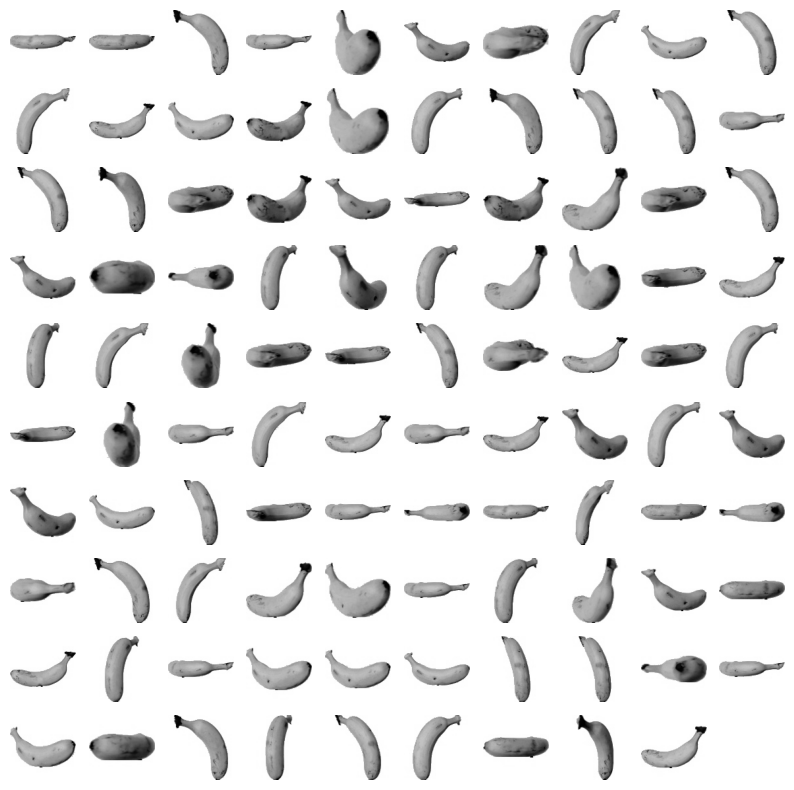

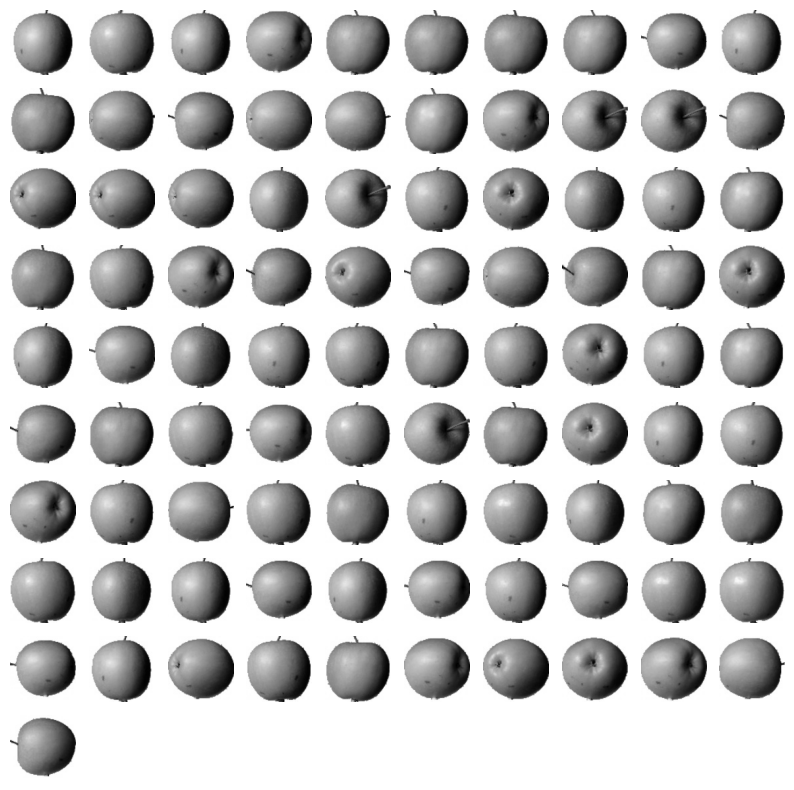

In [ ]:
#20
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")
#kmeans가 찾은 레이블을 사용해 과일 이미지를 출력

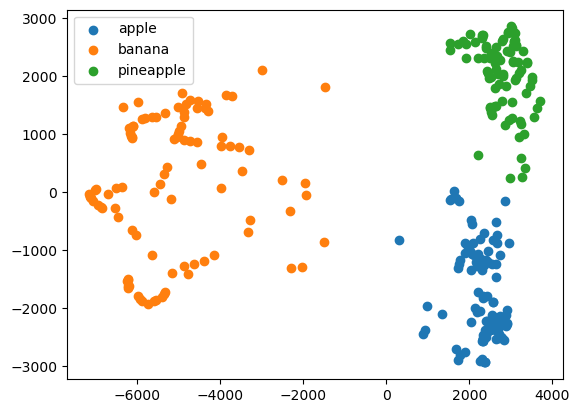

In [ ]:
#21
#훈련 데이터의 차원을 줄이면 시각화 하기 쉬움.
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0],data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()
#각 그림의 분포도 확인